In [27]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
foam = pd.read_csv('cal30.csv')
foam.head()



,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200


In [29]:
# Assign the data to X and y

X = foam[["totalRooms", "medianIncome"]]
y = foam["medianHouseValue"].values.reshape(-1, 1)
print(X.shape, y.shape)

(30, 2) (30, 1)


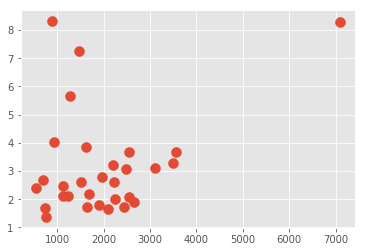

In [30]:
from sklearn.datasets.samples_generator import make_blobs

#X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)

X=X.values
plt.scatter(X[:, 0], X[:, 1], s=100, cmap="bwr");

plt.show()

In [31]:
# Support vector machine linear classifier

# There are different kernels available for the SVM model in SciKit-Learn,
# but we are going to use the linear model in this example.

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Plotting the decision boundaries for the trained model. Conceptually, this shows how the algorithm maximized the boundaries between the two groups.

In [32]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)

plt.show()

ValueError: cannot reshape array of size 1378440 into shape (6564,7)

# Validation

ValueError: c of shape (30, 1) not acceptable as a color sequence for x with size 30, y with size 30

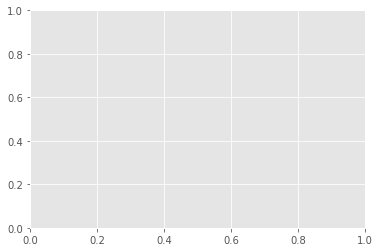

In [33]:
#X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [34]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Example of when the boundaries are overlapping. In this case, the svm algorithm will "soften" the margins and allow some of the data points to cross over the margin boundaries in order to obtain a fit.

In [36]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

ValueError: cannot reshape array of size 1010856 into shape (6564,7)

Generate a classification report to quantify and validate the model performance. Let us look at the **slideshow** to learn more about what these mean.

In [37]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

ValueError: Number of classes, 15, does not match size of target_names, 2. Try specifying the labels parameter